In [ ]:
# -*- coding: utf-8 -*-

import os
import jieba
import translators as ts
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re # 确保在脚本顶部导入 re 模块


# --- 配置区 ---

# 1. 设置数据目录
DATA_DIR = './data/'

# 2. ！！！【重要】请务必设置正确的中文字体路径！！！
#    - Windows: 'C:/Windows/Fonts/msyh.ttc' (微软雅黑) or 'C:/Windows/Fonts/simhei.ttf' (黑体)
#    - macOS: '/System/Library/Fonts/PingFang.ttc' (苹方)                                                                                   
#    - Linux: '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc' (思源黑体)
#    - 或者您下载的任何 .ttf/.otf 字体文件的路径
FONT_PATH = 'C:/Windows/Fonts/msyh.ttc'  # <--- 修改这里

# 3. 设置词云参数
MAX_WORDS = 100  # 词云中显示的最大词数
WIDTH = 1000     # 图片宽度
HEIGHT = 800     # 图片高度
BACKGROUND_COLOR = "white"  # 背景颜色

# 4. 中文停用词列表 (可根据需要扩展)
#    我们在这里排除单字和一些常见助词、连词等
STOPWORDS = {'的', '是', '了', '在', '也', '和', '就', '都', '我', '你', '他', '她', '它', '我们', '你们', '他们', '一种', '这个', '那个', '一个'}

"""
主函数：读取文件，分词，翻译，并生成带英文翻译的词云。
"""
print("步骤 1: 读取并合并文本文件...")
text = ""
if not os.path.exists(DATA_DIR):
    print(f"错误: 目录 '{DATA_DIR}' 不存在。请创建该目录并放入您的 .txt 文件。")

for filename in os.listdir(DATA_DIR):
    if filename.endswith(".txt"):
        file_path = os.path.join(DATA_DIR, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()
        except Exception as e:
            print(f"读取文件 {filename} 失败: {e}")

if not text:
    print("错误: 未能在 data 目录中找到任何文本内容。")

print("步骤 2: 使用 jieba 进行中文分词和过滤...")
# 使用精确模式分词，并过滤掉停用词和单个汉字
words = [word for word in jieba.cut(text) if word not in STOPWORDS and len(word.strip()) > 1]

# 统计词频
word_counts = Counter(words)

# 获取频率最高的词
top_words = word_counts.most_common(MAX_WORDS)
top_chinese_words = [word[0] for word in top_words]

print(f"步骤 3: 翻译前 {len(top_chinese_words)} 个高频词汇 (这可能需要一些时间)...")
translations = {}
for word in top_chinese_words:
    if word[0] in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ":
        translations[word] = ""
        continue
    try:
        # 使用 'bing' 翻译器，通常比较稳定
        # 注意：频繁请求可能导致IP被临时屏蔽
        translated_text = ts.translate_text(word, translator='bing', from_language='zh-CN', to_language='en')
        translations[word] = translated_text
        print(f"  {word} -> {translated_text}")
    except Exception as e:
        print(f"  翻译 '{word}' 时出错: {e}")
        translations[word] = ""  # 翻译失败则留空


步骤 1: 读取并合并文本文件...
步骤 2: 使用 jieba 进行中文分词和过滤...
步骤 3: 翻译前 100 个高频词汇 (这可能需要一些时间)...
  骑士 -> knight
  作为 -> As
  可以 -> OK
  自己 -> Myself
  不列颠 -> Britain
  深知 -> Know
  面对 -> confront
  不过 -> But
  确实 -> truly
  理解 -> understand
  这样 -> such
  时候 -> time
  需要 -> need
  保持 -> keep
  建议 -> suggestion
  或许 -> maybe
  战场 -> battlefield
  一样 -> The same
  时间 -> Time
  什么 -> what
  我会 -> I will
  现在 -> Right now
  挑战 -> challenge
  圣杯 -> grail
  战斗 -> fight
  沟通 -> communicate
  这种 -> This
  相信 -> believe
  正如 -> As
  一定 -> certain
  情况 -> circumstance
  认为 -> think
  尝试 -> try
  想起 -> remember
  如果 -> If
  坚持 -> Hang on
  觉得 -> felt
  一次 -> once
  不妨 -> might as well
  重要性 -> importance
  感觉 -> feel
  一下 -> one time
  找到 -> Found it
  感到 -> feel
  调整 -> adjust
  才能 -> talent
  专注 -> Focus
  内心 -> heart
  记住 -> Remember
  努力 -> Step up your game
  冷静 -> Calm down
  客户 -> client
  王者 -> king
  一名 -> A
  追求 -> pursue
  身为 -> As
  休息 -> rest
  并非 -> Not
  那种 -> That
  决定 -> decision
  明确 -> explic

In [11]:

new_top_words = {}
for item, value in dict(top_words).items():
    new_item = item + ' ' + translations.get(item, "")
    new_top_words[new_item] = value

print(new_top_words)

print("步骤 4: 生成词云布局...")
# 仅使用词频来生成布局，而不直接生成图像
wc = WordCloud(
    font_path=FONT_PATH,
    width=WIDTH,
    height=HEIGHT,
    background_color=BACKGROUND_COLOR,
    max_words=MAX_WORDS,
    prefer_horizontal=0.95, # 尽量让词语水平排列
    # collocations=False to avoid grouping words
    collocations=False
).generate_from_frequencies(dict(new_top_words))


{'Master ': 93, '骑士 knight': 52, '作为 As': 41, '可以 OK': 37, '自己 Myself': 26, '不列颠 Britain': 24, '深知 Know': 21, '面对 confront': 21, '不过 But': 21, '确实 truly': 21, '理解 understand': 20, '这样 such': 19, '时候 time': 18, '需要 need': 18, '保持 keep': 16, '建议 suggestion': 16, '或许 maybe': 15, '战场 battlefield': 15, '一样 The same': 15, '时间 Time': 15, '什么 what': 15, '我会 I will': 14, '现在 Right now': 14, '挑战 challenge': 13, '圣杯 grail': 13, '战斗 fight': 13, '沟通 communicate': 13, '这种 This': 12, '相信 believe': 12, '正如 As': 12, '一定 certain': 12, '情况 circumstance': 12, '认为 think': 12, '尝试 try': 12, '想起 remember': 12, '如果 If': 11, '坚持 Hang on': 11, '觉得 felt': 11, '一次 once': 11, '不妨 might as well': 11, '重要性 importance': 11, '感觉 feel': 10, '一下 one time': 10, '找到 Found it': 10, '感到 feel': 10, '调整 adjust': 10, '才能 talent': 10, '专注 Focus': 10, '内心 heart': 9, '记住 Remember': 9, '努力 Step up your game': 9, '冷静 Calm down': 9, '客户 client': 9, '王者 king': 9, '一名 A': 8, '追求 pursue': 8, '身为 As': 8, '休息 rest': 8, '并非 Not': 8, '那种 T

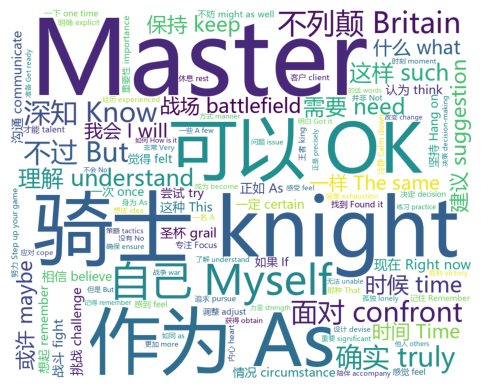

display success!


In [12]:


plt.imshow(wc)  # 展示词云图
plt.axis('off')
plt.show()
print('display success!')
 
# 保存词云图片
wc.to_file('test.jpg')

步骤 5: 使用 Matplotlib 绘制自定义词云...
1000 800
('Master ', 1.0) 221 (19, 42) None rgb(72, 41, 121)
75.60000000000001 1405.8 42 19
('骑士 knight', 0.5591397849462365) 172 (392, 51) None rgb(52, 96, 141)
91.8 734.4 51 392
('作为 As', 0.44086021505376344) 154 (643, 171) None rgb(46, 110, 142)
307.8 282.6 171 643
('可以 OK', 0.3978494623655914) 146 (233, 346) None rgb(33, 143, 141)
622.8000000000001 1020.6 346 233
('自己 Myself', 0.27956989247311825) 88 (545, 217) None rgb(36, 134, 142)
390.6 459.0 217 545
('不列颠 Britain', 0.25806451612903225) 62 (1, 580) None rgb(71, 17, 100)
1044.0 1438.2 580 1
('深知 Know', 0.22580645161290322) 58 (196, 30) None rgb(61, 78, 138)
54.0 1087.2 30 196
('面对 confront', 0.22580645161290322) 58 (628, 608) None rgb(72, 29, 111)
1094.4 309.6 608 628
('不过 But', 0.22580645161290322) 58 (282, 30) None rgb(54, 93, 141)
54.0 932.4 30 282
('确实 truly', 0.22580645161290322) 58 (724, 705) None rgb(32, 146, 140)
1269.0 136.8 705 724
('理解 understand', 0.21505376344086022) 49 (342, 18) None r

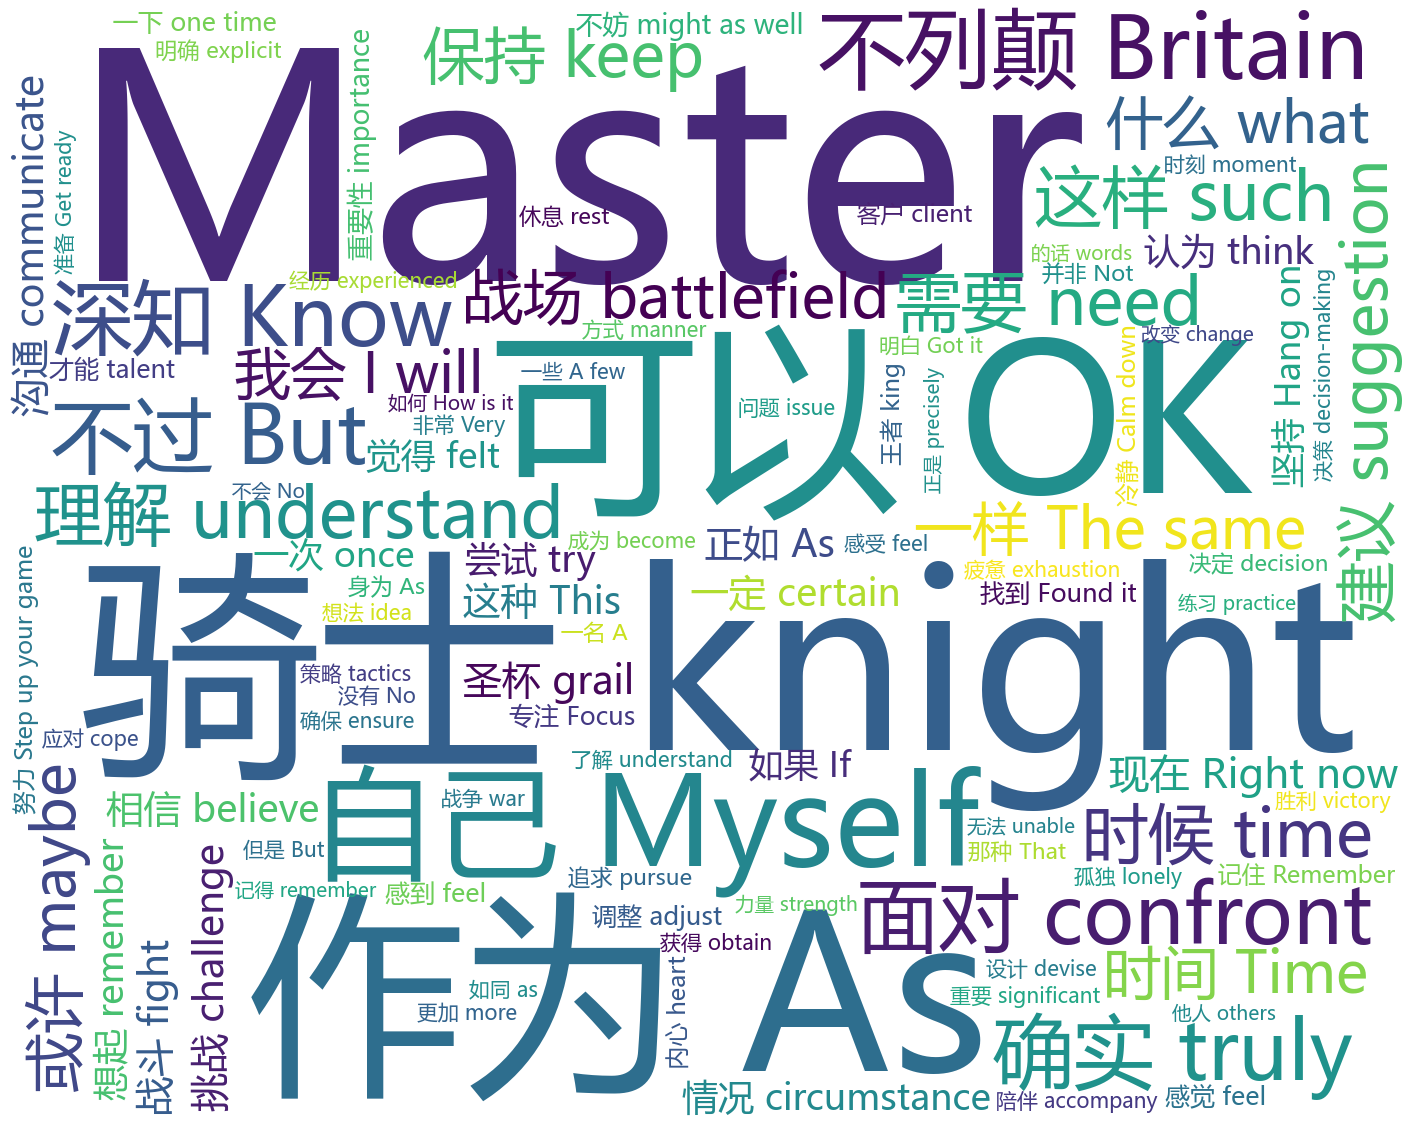

In [13]:



print("步骤 5: 使用 Matplotlib 绘制自定义词云...")
fig, ax = plt.subplots(figsize=(WIDTH / 100, HEIGHT / 100))
ax.set_facecolor(BACKGROUND_COLOR)

# 将坐标轴范围设置为词云的画布大小
print(wc.width, wc.height)
ax.set_xlim(0, wc.width)
ax.set_ylim(0, wc.height)
def convert_color_format(color_str):
    """将 'rgb(r, g, b)' 格式的颜色字符串转换为 matplotlib 接受的 (r/255, g/255, b/255) 元组格式。"""
    match = re.search(r'rgb\((\d+), \s*(\d+), \s*(\d+)\)', color_str)
    if match:
        r, g, b = map(int, match.groups())
        return (r / 255.0, g / 255.0, b / 255.0)
    # 如果格式不匹配，返回一个默认颜色
    return 'black'
# 遍历词云布局信息 (word, font_size, position, orientation, color)
for word, font_size, position, orientation, color in wc.layout_:
    print(word, font_size, position, orientation, color)
    x, y = position[1] * 1.8, (800 - position[0]) * 1.8 # position 是 (y, x) 格式
    print(x, y, position[1], position[0])
    # x, y = 0, 800
    color = convert_color_format(color)
    word = word[0]
    # 绘制中文词
    is_horizontal = orientation is None or orientation == 0
    rotation = 0 if is_horizontal else 90
    
    ax.text(x, y, word,
            fontsize=font_size,
            fontproperties={'fname': FONT_PATH}, # 必须指定字体
            color=color,
            ha='left',
            va='top',
            rotation=rotation)
    # continue
    

    # 获取并绘制英文翻译
    english_word = translations.get(word, "")
    
    
    if english_word:
        # 英文使用较小的字体大小
        english_font_size = max(font_size * 0.3, 8)

        if is_horizontal:
            # 如果是水平词，将英文放在正下方
            offset_y = font_size * 0.45
            ax.text(x, y - offset_y, f"{english_word}",
                    fontsize=english_font_size,
                    color=color,
                    ha='center',
                    va='center')
        else:
            # 如果是垂直词，将英文放在右侧（保持水平以方便阅读）
            offset_x = font_size * 0.5
            ax.text(x + offset_x, y, f"{english_word}",
                    fontsize=english_font_size,
                    color=color,
                    ha='left',
                    va='center')

# 关闭坐标轴显示
ax.axis('off')
# plt.tight_layout(pad=0)

# 保存并显示图像
output_filename = "wordcloud_with_translation.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight', pad_inches=0)
print(f"\n词云已生成并保存为 '{output_filename}'")
plt.show()
